In [1]:
%load_ext autoreload
%autoreload 2

!pip3 install sentencepiece
!pip3 install tf-sentencepiece
!pip3 install matplotlib
#!pip3 install tqdm
#!pip install tensorflow==1.13.1

import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
gitDir = "/content/gdrive/My Drive/nlp/"
os.chdir(gitDir + "training/")
os.chdir(gitDir)
print(os.listdir("."))

#sys.path.insert(0,gitDir + "data")

import tensorflow as tf
import training.train as t

     |████████████████████████████████| 1.0MB 2.7MB/s 
     |████████████████████████████████| 2.4MB 2.9MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['.git', 'README.md', 'data', 'presentations', '.idea', 'training', 'blobs', '.gitignore']


W0613 13:48:55.051917 140311663781760 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


saving to: blobs/2019-06-13_trainXLING_baseline/
data/cache/amazon_reviews_multilingual_US_v1_00.tsv.shuffled.csv already exists. Using cached data
data/cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled.csv already exists. Using cached data
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 14:12:12.048397 140311663781760 saver.py:1483] Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



	Epoch 1: train_loss: 2.4687, train_acc: 0.5606, train_micro-f1: 0.5606 || val_loss: 1.7316, val_acc: 0.6244, val_micro-f1: 0.6244



	Epoch 2: train_loss: 1.1953, train_acc: 0.6720, train_micro-f1: 0.6163 || val_loss: 1.1882, val_acc: 0.6441, val_micro-f1: 0.6342



	Epoch 3: train_loss: 0.9096, train_acc: 0.7177, train_micro-f1: 0.6501 || val_loss: 1.0321, val_acc: 0.6825, val_micro-f1: 0.6503



	Epoch 4: train_loss: 0.7951, train_acc: 0.7394, train_micro-f1: 0.6724 || val_loss: 0.9710, val_acc: 0.6845, val_micro-f1: 0.6588



	Epoch 5: train_loss: 0.7209, train_acc: 0.7598, train_micro-f1: 0.6899 || val_loss: 0.8784, val_acc: 0.7358, val_micro-f1: 0.6742



	Epoch 6: train_loss: 0.6636, train_acc: 0.7740, train_micro-f1: 0.7039 || val_loss: 0.8977, val_acc: 0.7194, val_micro-f1: 0.6818



	Epoch 7: train_loss: 0.6138, train_acc: 0.7877, train_micro-f1: 0.7159 || val_loss: 0.8609, val_acc: 0.7433, val_micro-f1: 0.6906



	Epoch 8: train_loss: 0.5608, train_acc: 0.8067, train_micro-f1: 0.7272 || val_loss: 0.9182, val_acc: 0.7065, val_micro-f1: 0.6925



	Epoch 9: train_loss: 0.5169, train_acc: 0.8238, train_micro-f1: 0.7380 || val_loss: 0.9310, val_acc: 0.7246, val_micro-f1: 0.6961



	Epoch 10: train_loss: 0.4660, train_acc: 0.8474, train_micro-f1: 0.7489 || val_loss: 0.9555, val_acc: 0.7094, val_micro-f1: 0.6974
saving results to: blobs/2019-06-13_trainXLING_baseline/


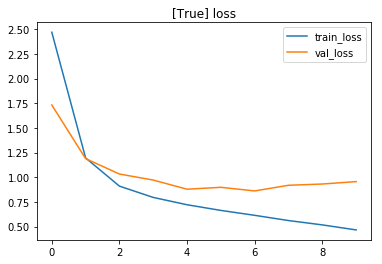

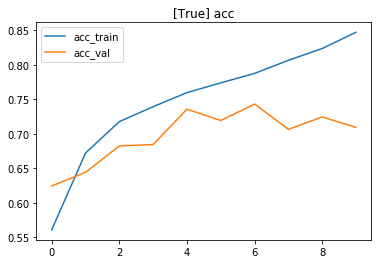

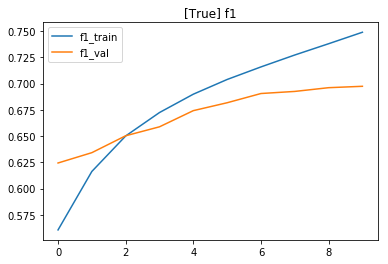

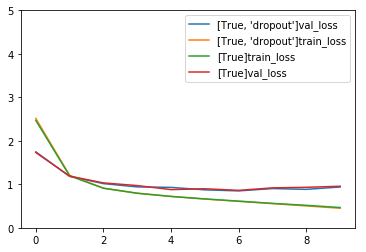

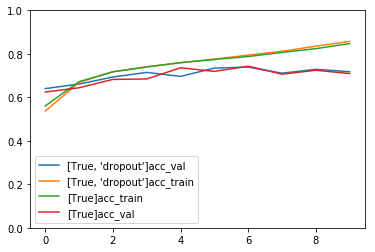

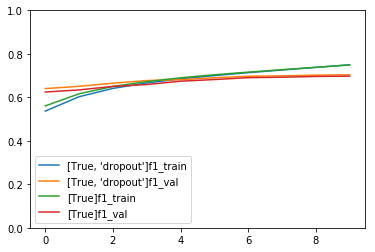

CPU times: user 45min 21s, sys: 13min 30s, total: 58min 51s
Wall time: 1h 8min 21s


In [3]:
%%time

params = {}
params["trainData"] = "US"
params["testData"] = "DE"
params["epochs"] = 10
params["batchSize"] = 512
params["optimizer"] = tf.train.AdamOptimizer(epsilon=1e-03)
params["trainexamples"] = 1000 * 100
params["architecture"] = [True]
params["f1modus"] = "micro"
params["savelog"] = True
params["path"] = "blobs/" + "2019-06-13" + "_trainXLING_baseline/"
#params["path"] = "blobs/test/"
#params["pathToCache"] = "../data/"
    
result = t.trainModel(params)

In [0]:
%%time

params = {}
params["trainData"] = "US"
params["testData"] = "DE"
params["epochs"] = 10
params["batchSize"] = 512
params["optimizer"] = tf.train.AdamOptimizer()
params["trainexamples"] = 1000 * 100
params["architecture"] = [True, "dropout"]
params["f1modus"] = "micro"
params["savelog"] = True
params["path"] = "blobs/" + "2019-06-13" + "_trainXLING_baseline/"
#params["path"] = "blobs/test/"
#params["pathToCache"] = "../data/"
    
result = t.trainModel(params)

In [0]:
%%time

params = {}
params["trainData"] = "US"
params["testData"] = "DE"
params["epochs"] = 10
params["batchSize"] = 512
params["optimizer"] = tf.train.AdamOptimizer(learning_rate=0.0005) #default: learning_rate=0.001
params["trainexamples"] = 1000 * 100
params["architecture"] = [True,"d"]
params["f1modus"] = "micro"
params["savelog"] = True
params["path"] = "blobs/" + "2019-06-13" + "_trainXLING_baseline/"
#params["path"] = "blobs/test/"
#params["pathToCache"] = "../data/"
    
result = t.trainModel(params)